# MLE - As Probability Goes Towards Zero

In [1]:
from matplotlib import pyplot as plot
import sympy as sp

from matplotlib.colors import hsv_to_rgb
from scipy.optimize import fsolve, minimize
from sympy import Symbol, lambdify

import DistExampB as db

from Map import LogRatio
from LocUtil import Grid1, IndexOf, LogGrid1, Sub

#### Constants

In [2]:
nPlot = 101

## Set Up

In [3]:
pSym = Symbol('p')
nSym = Symbol('n')
mSym = Symbol('m')

In [4]:
pMGiveP = sp.binomial(nSym, mSym) * pSym ** mSym * (1 - pSym) ** (nSym - mSym)
pMGiveP

p**m*(1 - p)**(-m + n)*binomial(n, m)

In [5]:
colorL = tuple(tuple(hsv_to_rgb((2/3 + k*1/6, 1, 1))) for k in range(-1,2))
colorL

((0.0, 1.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 1.0))

In [6]:
pL = (0.1, 0.5, 0.9)
pL

(0.1, 0.5, 0.9)

Text(0, 0.5, 'Probability')

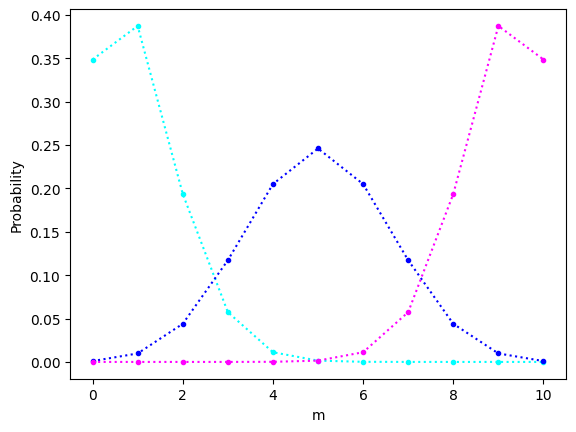

In [7]:
n = 10

mL = tuple(n for n in range(n + 1))
	
for k in range(3):
	pGrid = tuple(pMGiveP.subs({nSym:n, pSym:pL[k], mSym:m}).evalf() for m in mL)

	plot.plot(mL,pGrid, '.:', c=colorL[k])

plot.xlabel('m')
plot.ylabel('Probability')

## Bayesian

### consider an uninformed prior

In [59]:
pdfP = 1
pdfP

1

In [60]:
probM = sp.integrate(pMGiveP * pdfP, (pSym,0,1))
probM

binomial(n, m)*gamma(m + 1)*hyper((m + 1, m - n), (m + 2,), 1)/gamma(m + 2)

Text(0, 0.5, 'Weight')

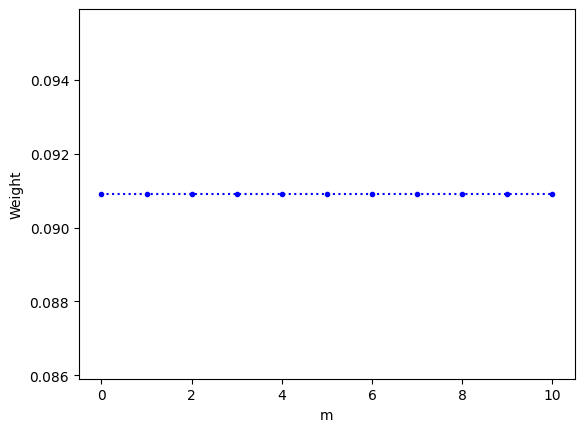

In [62]:
pMGrid = tuple(probM.subs({nSym:n, mSym:m}).evalf() for m in mL)

plot.plot(mL,pMGrid, '.:', c='blue')

plot.xlabel('m')
plot.ylabel('Weight')

In [65]:
pPGiveM = 11 * pMGiveP.subs(nSym,n)
pPGiveM

11*p**m*(1 - p)**(10 - m)*binomial(10, m)

Check that this is correctly scaled

In [66]:
sp.integrate(pPGiveM.subs(mSym,0), (pSym,0,1))

1

In [67]:
pPGiveM.subs({mSym:0, pSym:0})

11

In [35]:
colorL = tuple(hsv_to_rgb((hue,1,1)) for hue in Grid1(0,2/3, n+1))

In [36]:
expP = lambda m: sp.integrate(pPGiveM.subs(mSym,m) * pSym, (pSym,0,1))

Maple can evaluate this symbolic in milliseconds, and the answer is (m + 1) / (n + 2) !!!

Text(0, 0.5, 'PDF')

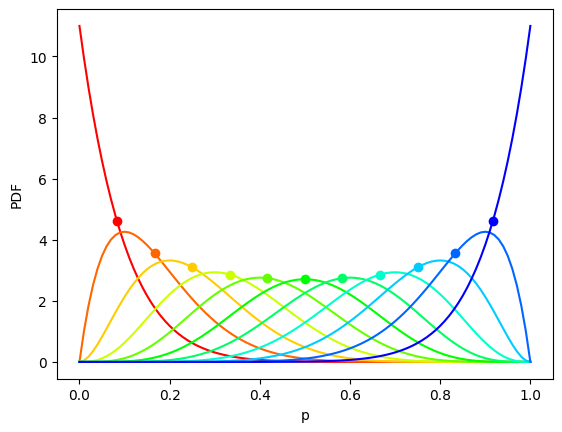

In [37]:
pGrid = Grid1(0,1,nPlot)

for m in range(n + 1):
	probP = tuple(pPGiveM.subs({pSym: p, mSym: m}).evalf() for p in pGrid)
	plot.plot(pGrid,probP, c=colorL[m])
	
	pUnBiased = expP(m)
	pdfUnBiased = pPGiveM.subs({pSym: pUnBiased, mSym: m}).evalf()
	plot.plot(pUnBiased, pdfUnBiased, 'o', c=colorL[m])

plot.xlabel('p')
plot.ylabel('PDF')

## consider an informed prior

In [45]:
pdfP = 6 * pSym * (1 - pSym)

In [46]:
sp.integrate(pdfP, (pSym,0,1))

1

Text(0, 0.5, 'PDF')

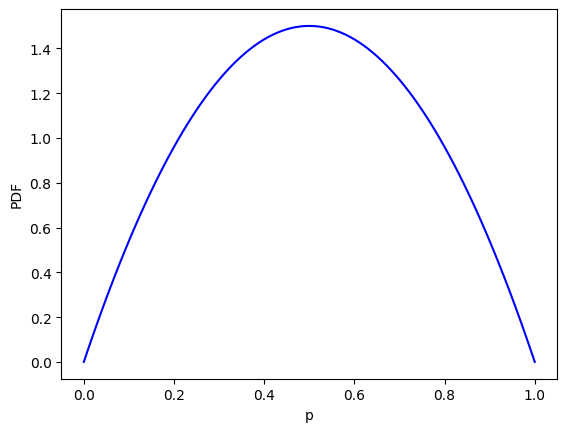

In [47]:
pGrid = Grid1(0,1, nPlot)
probP = tuple(pdfP.subs(pSym,p) for p in pGrid)

plot.plot(pGrid,probP, c='blue')

plot.xlabel('p')
plot.ylabel('PDF')

#### the probability of m

In [72]:
probM = lambda m,n: 6 * (m + 1) * (n + 1 - m) / ((n + 2) * (n + 3)) 

Text(0, 0.5, 'Mass')

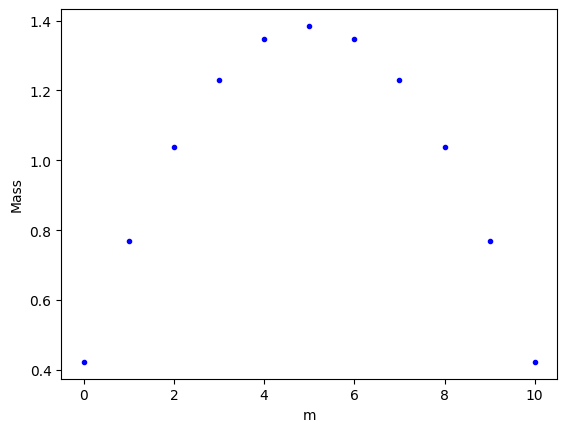

In [74]:
pMGrid = tuple(probM(m,10) for m in mL)

plot.plot(mL, pMGrid, '.', c='blue')

plot.xlabel('m')
plot.ylabel('Prob. Mass')

KeyboardInterrupt: 

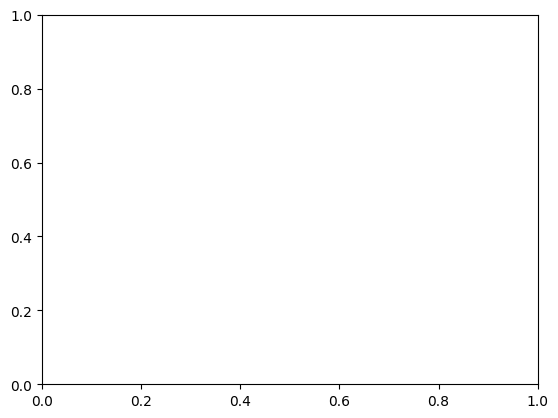

In [57]:
_,ax = plot.subplots() 

pMGrid = tuple(probM(m) for m in mL)
plot.plot(mL, pMGrid, '.:', c='blue')

plot.xlabel('m')
plot.ylabel('Probability')

_,yMax = ax.get_ylim()
ax.set_ylim(0,yMax)

#### the probability of p given m

In [ ]:
pPGiveM = pMGiveP.subs(nSym,n)
pPGiveM